In [3]:
#import important modules
import pandas as pd                      #for dataframes and preparing the data 
import matplotlib.pyplot as plt          #for plotting of graphs
import seaborn as sns                    #for plotting of graphs
%matplotlib inline                       #This line configures matplotlib to show figures embedded in the notebook

In [17]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9de44eedff024797b6ae7fb37d9e5488 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kmNYRy7uUVutIQSYcnZRaJuHsahIMxeJUlKZ3aFbEqUI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9de44eedff024797b6ae7fb37d9e5488.get_object(Bucket='employeechurn-donotdelete-pr-cw8zkhevvq4xke',Key='HR_comma_sep.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

HR_data = pd.read_csv(body)        
HR_data.head()                     #printing top 5 rows of the dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
HR_data.tail()      #printing last 5 rows of the dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [20]:
HR_data.info()          #attributes names and datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
employee_churn = HR_data.groupby('left')             #grouping by people who've left and who've stayed
employee_churn.mean()                                #calculating mean of all the factors affecting the target label

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [25]:
HR_data.describe()           #getting various summary statistics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [29]:
employee_churn_count = HR_data.left.value_counts()        #no. of employees who left the company
print(employee_churn_count)

0    11428
1     3571
Name: left, dtype: int64


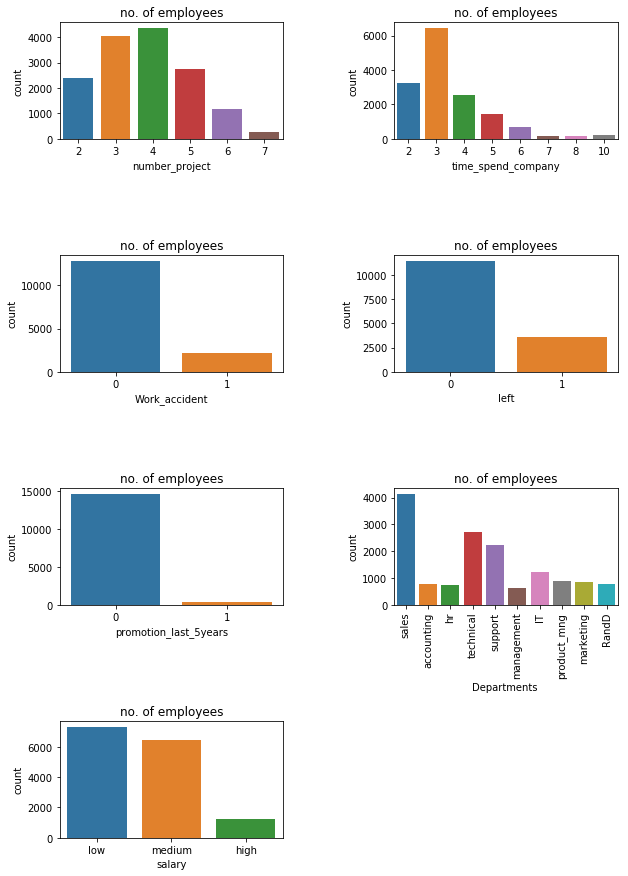

In [47]:
features = ['number_project','time_spend_company','Work_accident', \
            'left', 'promotion_last_5years','Departments ','salary']   #analyzing all factors for all employees of the company
fig = plt.subplots(figsize=(10,15))                                    #storing a reference in fig instance

for i, j in enumerate(features):                                       #enumerate() method adds a counter to the iterable
    plt.subplot(4,2,i+1)                                               #defining how many graphs in each row and column to be displayed
    plt.subplots_adjust(hspace = 1.0, wspace = 0.5)                    #height and width between the graphs
    sns.countplot(x=j,data=HR_data)                                    #parameters
    if i==5:
        plt.xticks(rotation=90) 
    plt.xticks()                                            
    plt.title('no. of employees')                                      

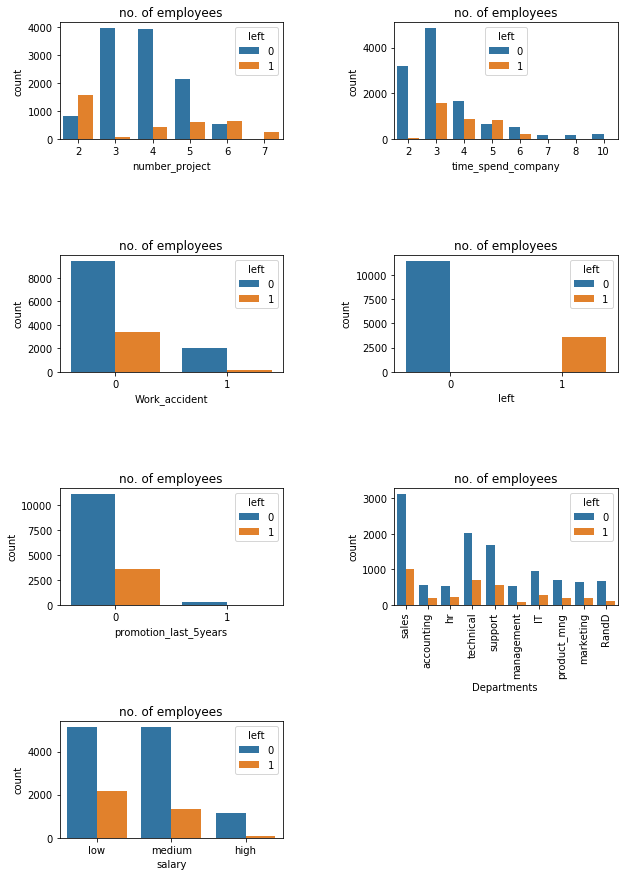

In [48]:
features = ['number_project','time_spend_company','Work_accident', \
            'left', 'promotion_last_5years','Departments ','salary']   #analyzing all factors for all employees of the company
fig = plt.subplots(figsize=(10,15))                                    #storing a reference in fig instance

for i, j in enumerate(features):                                       #enumerate() method adds a counter to the iterable
    plt.subplot(4,2,i+1)                                               #defining how many graphs in each row and column to be displayed
    plt.subplots_adjust(hspace = 1.0, wspace = 0.5)                    #height and width between the graphs
    sns.countplot(x=j,data=HR_data,hue='left')                         #parameters
    if i==5:
        plt.xticks(rotation=90) 
    plt.xticks()                                            
    plt.title('no. of employees')                                      

In [60]:
from sklearn.cluster import KMeans
employee_left = HR_data[['satisfaction_level','last_evaluation']][HR_data.left == 1]     
clust1 = KMeans(n_clusters = 3, random_state = 0).fit(employee_left)                     #fitting the data and forming 3 clusters

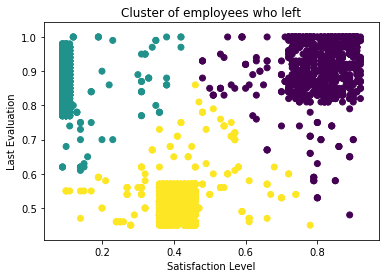

In [76]:
employee_left['label'] = clust1.labels_
plt.scatter(employee_left['satisfaction_level'],employee_left['last_evaluation'],c=employee_left['label'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Cluster of employees who left')
plt.show()

In [80]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()                                    #creating labelEncoder object
HR_data['salary']=le.fit_transform(HR_data['salary'])                # Converting string labels into numbers.
HR_data['Departments ']=le.fit_transform(HR_data['Departments '])

In [83]:
X=HR_data[['satisfaction_level', 'last_evaluation', 'number_project', \
       'average_montly_hours', 'time_spend_company', 'Work_accident', \
       'promotion_last_5years', 'Departments ', 'salary']]
Y=HR_data['left']

In [85]:
from sklearn.model_selection import train_test_split                                         #importing libraries to split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)     #0.3=30% test data and 70% training data 

In [92]:
!pip install scikit-learn==0.20.0
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()                                 #Create Gradient Boosting Classifier
gb.fit(X_train, Y_train)                                          #fitting the data to train the model
Y_pred = gb.predict(X_test)                                       #Predict response for test dataset

     |████████████████████████████████| 5.3MB 7.1MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.20.0 which is incompatible.
  Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [94]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))                 #Accuracy of the model
print("Precision:",metrics.precision_score(Y_test, Y_pred))               #Precision of the model
print("Recall:",metrics.recall_score(Y_test, Y_pred))                     #Accuracy of the model

Accuracy: 0.9768888888888889
Precision: 0.9651394422310757
Recall: 0.9335260115606936
